In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.shape

(200, 5)

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#  exploratory data analysis

Text(0, 0.5, 'Count')

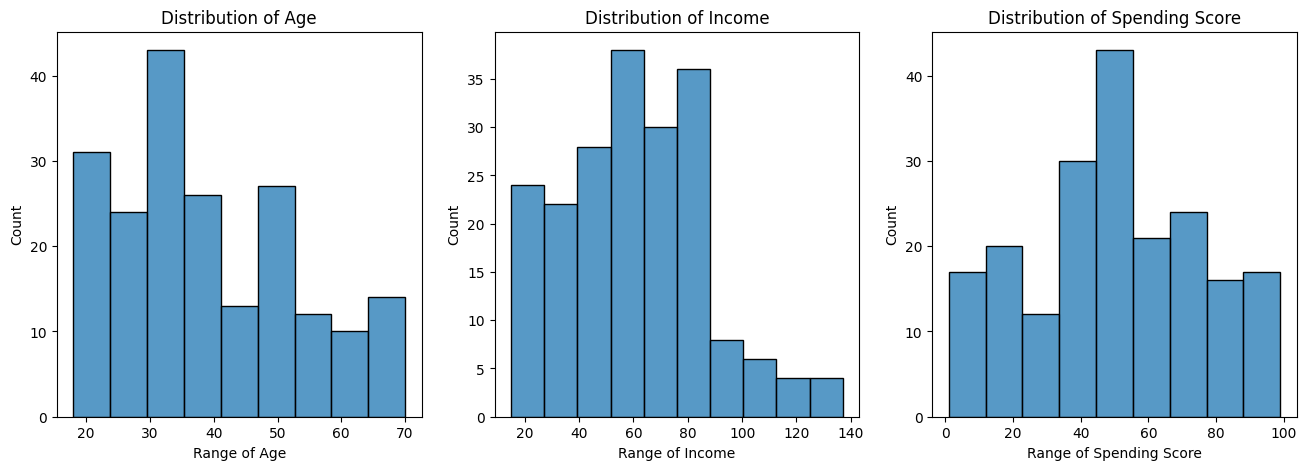

In [11]:
plt.figure(figsize =(16,5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

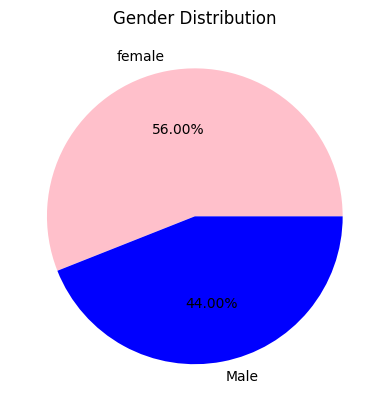

In [12]:
df = data.groupby('Gender').size()
df.plot(kind='pie',subplots = True,colors =['pink','blue'],explode=[0,0.001],labels=['female','Male'],autopct='%.2f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

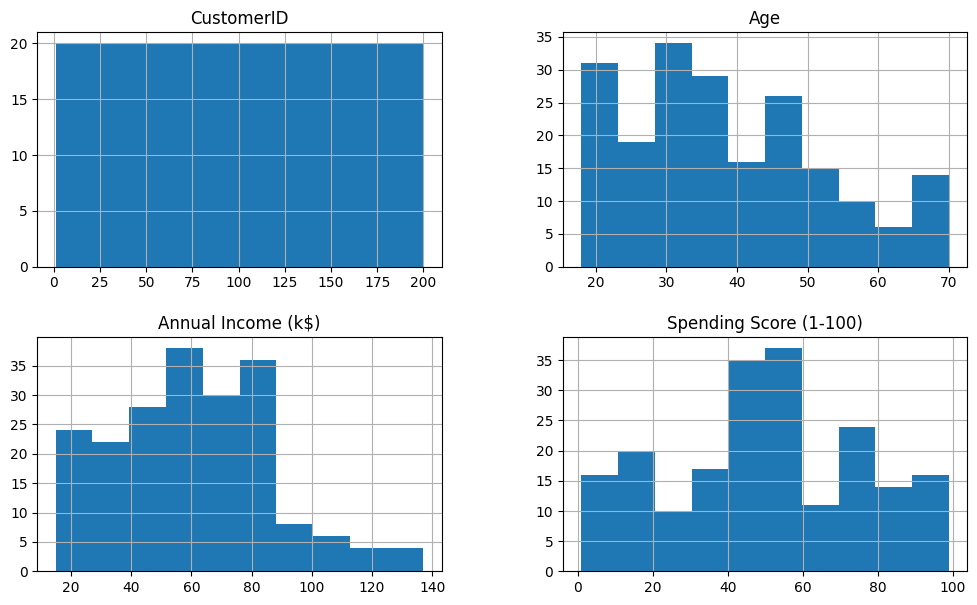

In [13]:
data.hist(figsize=(12,7))
plt.show()

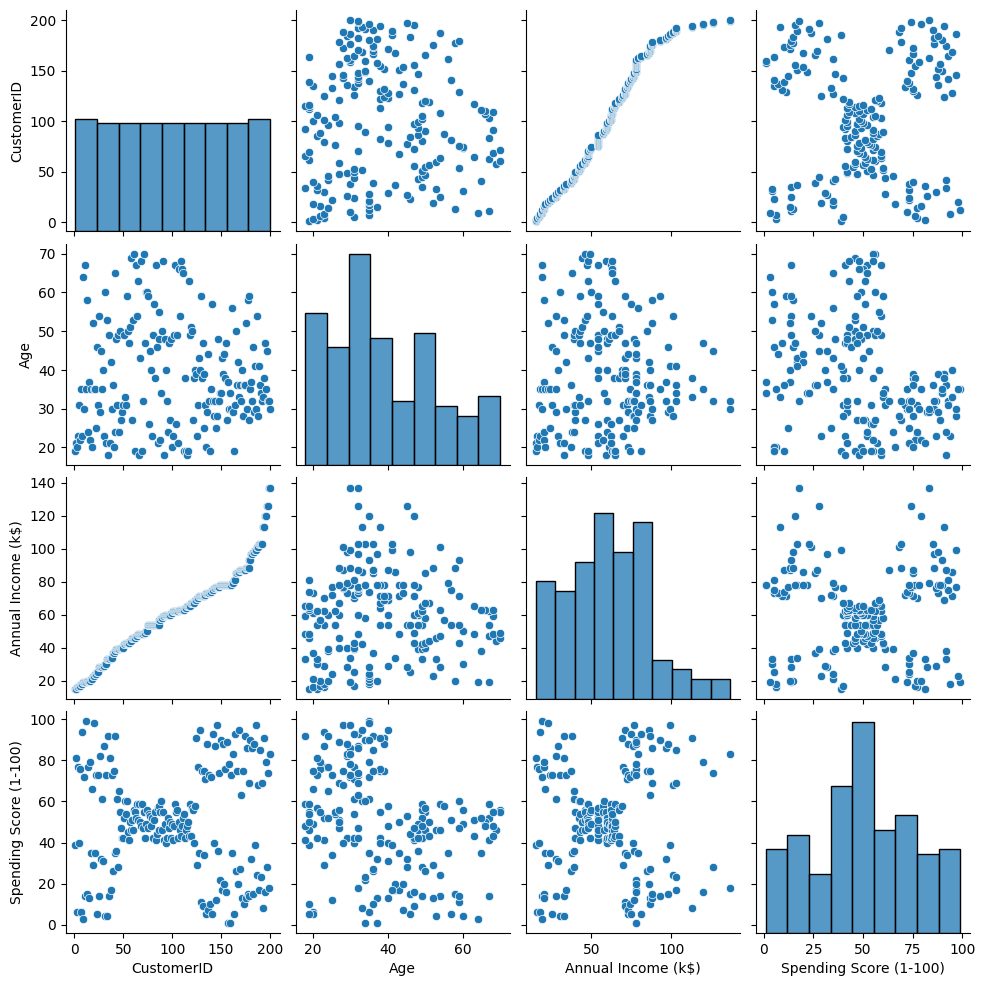

In [14]:
sns.pairplot(data)
plt.show()

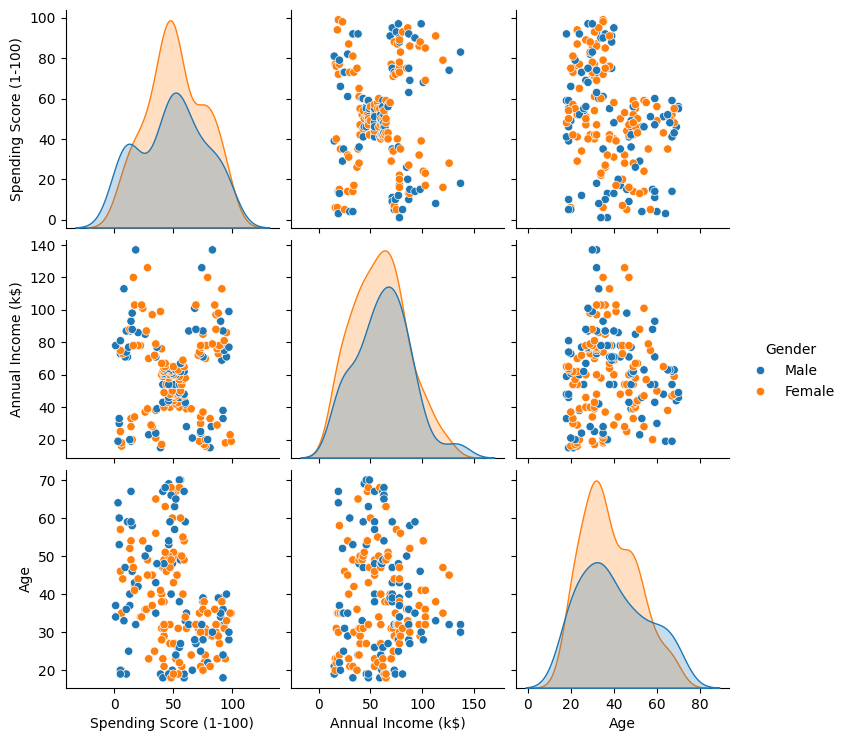

In [15]:
sns.pairplot(data,vars=['Spending Score (1-100)','Annual Income (k$)','Age'],hue = 'Gender')

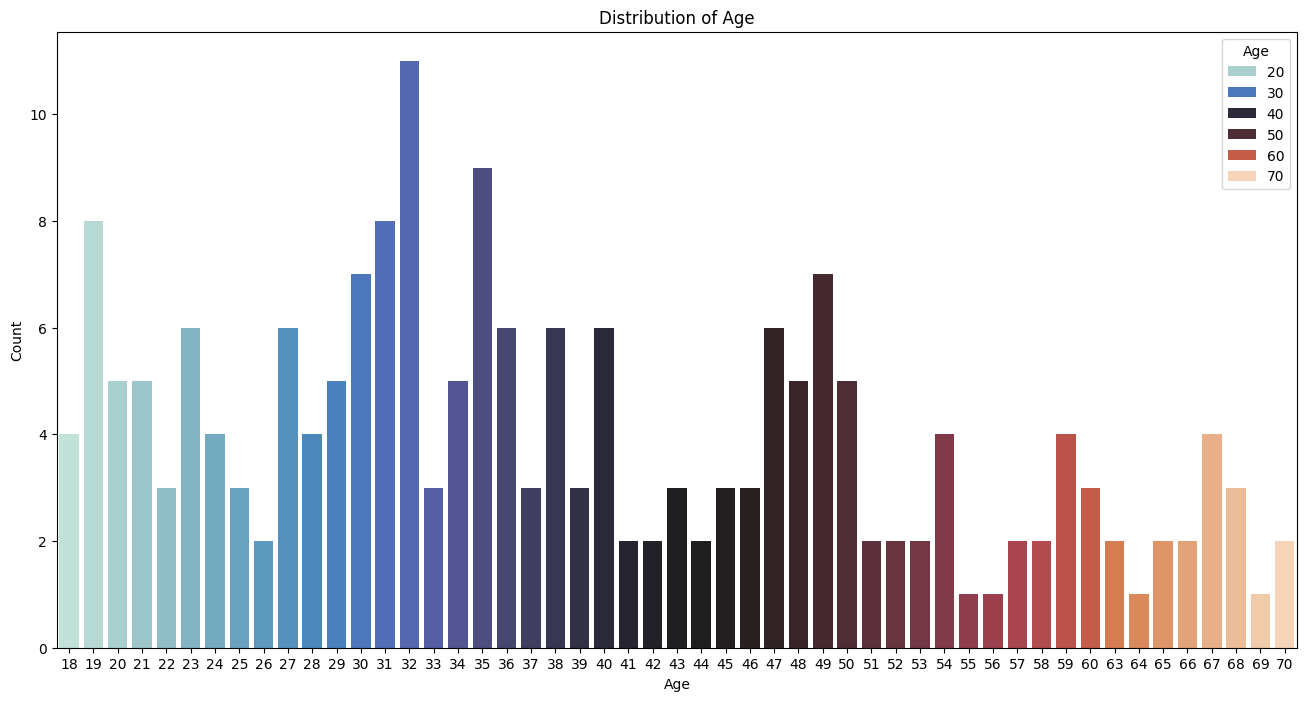

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(data=data, x='Age',hue = 'Age',palette ="icefire") 
plt.title("Distribution of Age")  
plt.xlabel("Age")  
plt.ylabel("Count")  
plt.show()  


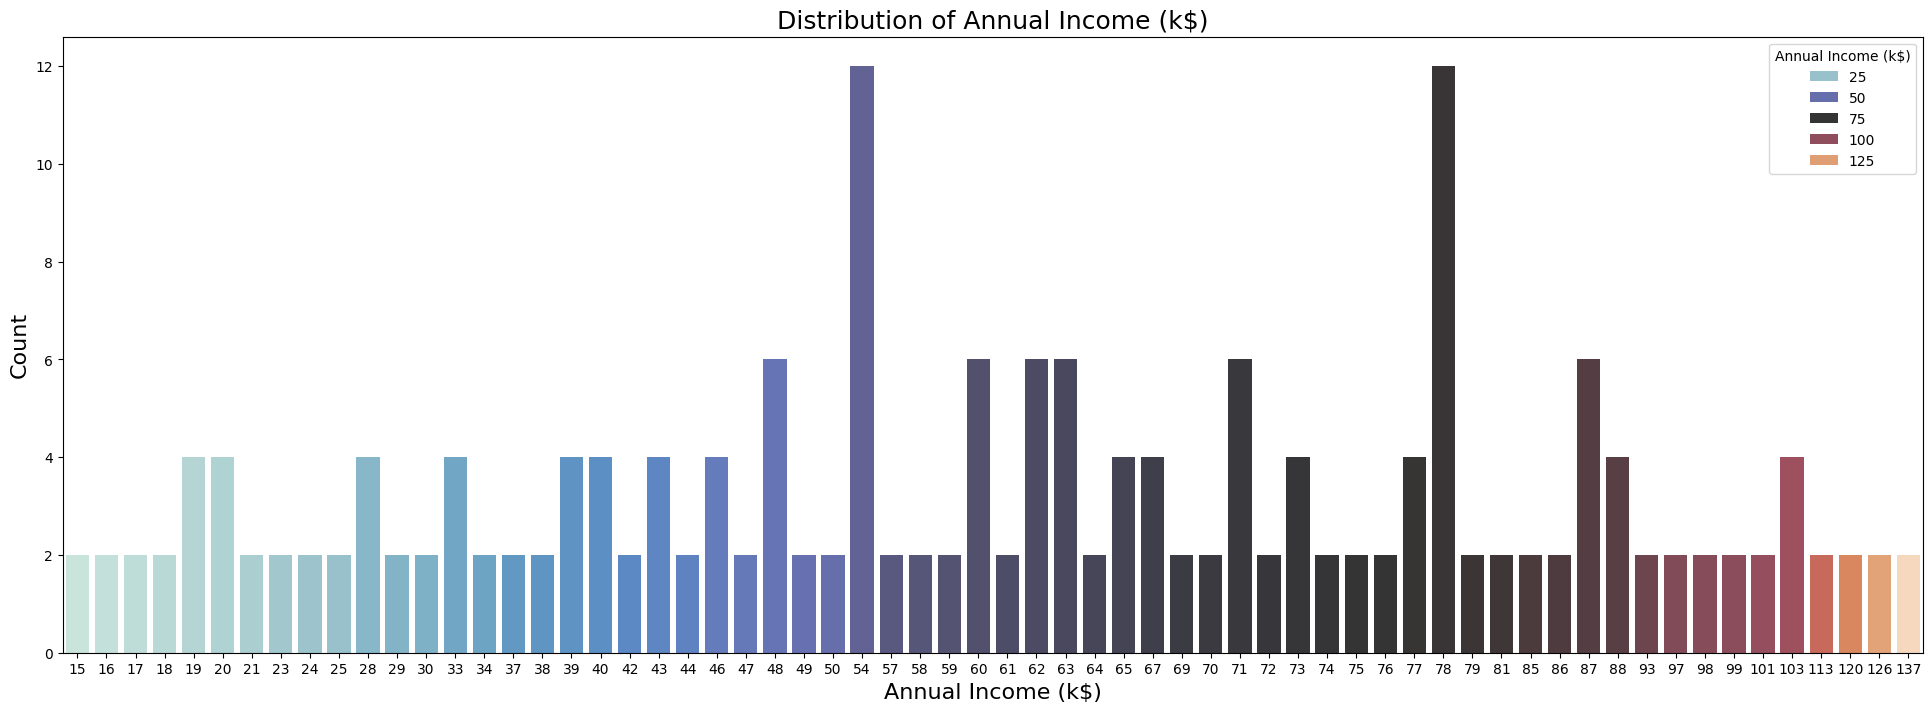

In [17]:
plt.figure(figsize=(24,8))
sns.countplot(data=data, x='Annual Income (k$)',hue = 'Annual Income (k$)',palette ="icefire",alpha =0.9) 
plt.title("Distribution of Annual Income (k$)",fontsize=18)  
plt.xlabel("Annual Income (k$)", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
plt.show()  

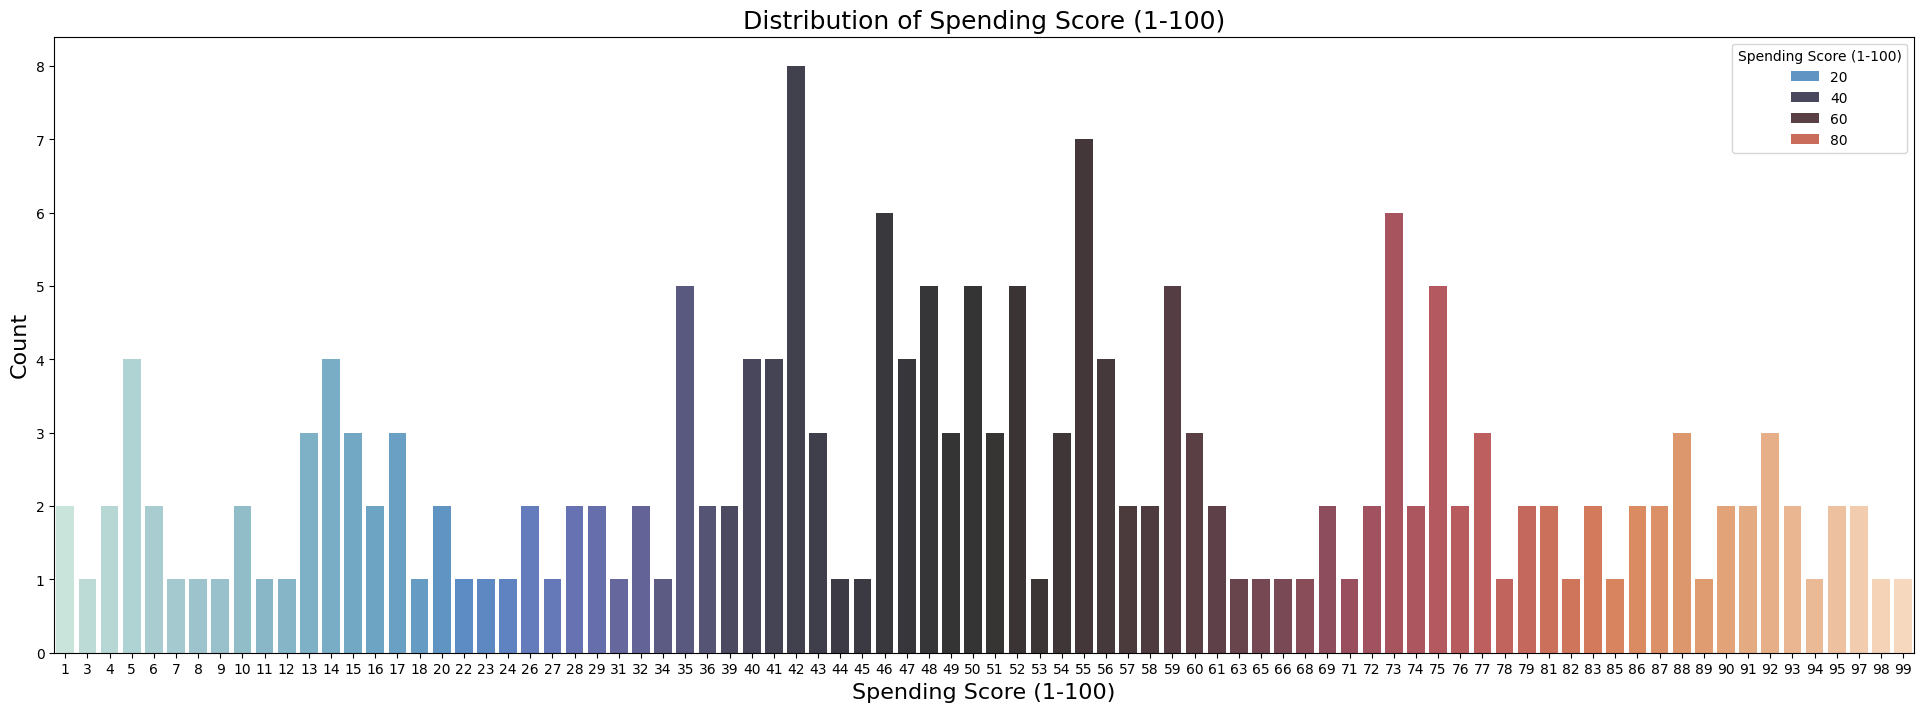

In [18]:
plt.figure(figsize=(24,8))
sns.countplot(data=data, x='Spending Score (1-100)',hue = 'Spending Score (1-100)',palette ="icefire",alpha =0.9) 
plt.title("Distribution of Spending Score (1-100)",fontsize=18)  
plt.xlabel("Spending Score (1-100)", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
plt.show()  

Target looks like regression


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.46E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

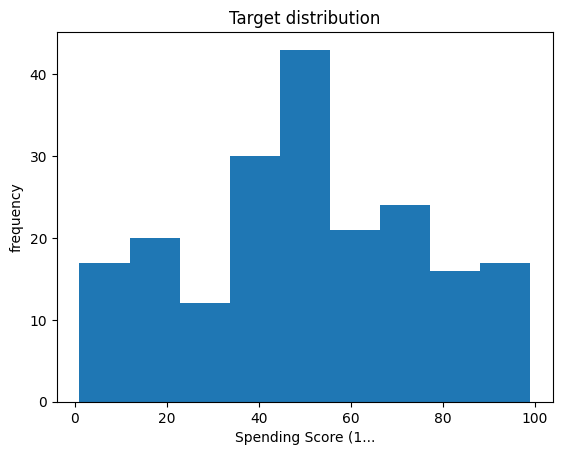

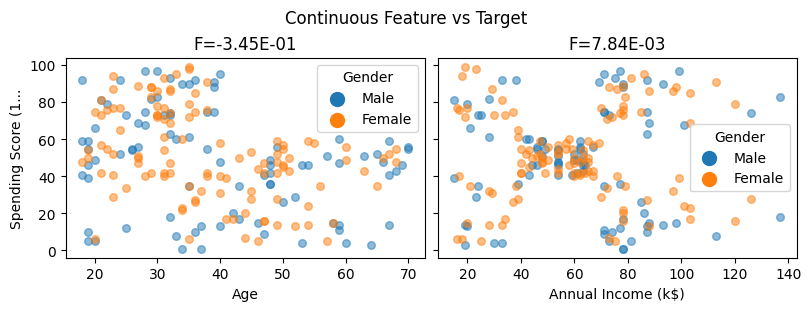

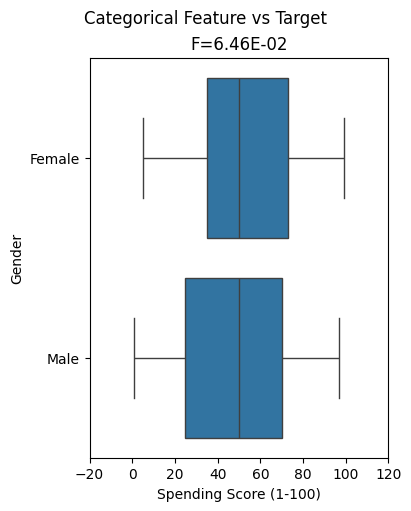

In [19]:
import dabl
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

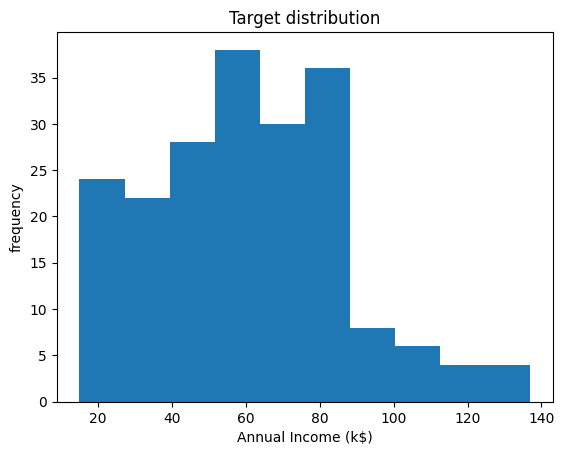

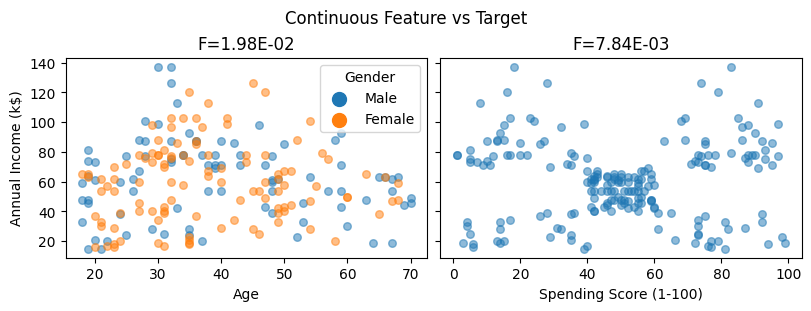

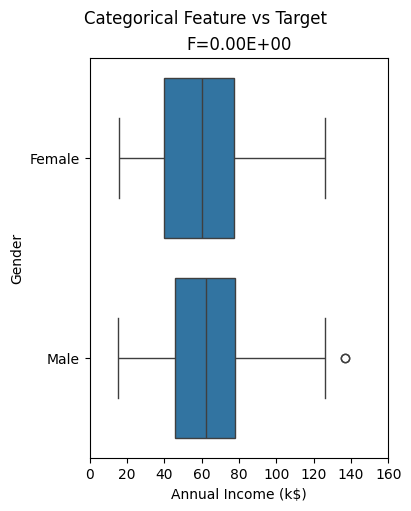

In [20]:
dabl.plot(data, target_col = 'Annual Income (k$)')

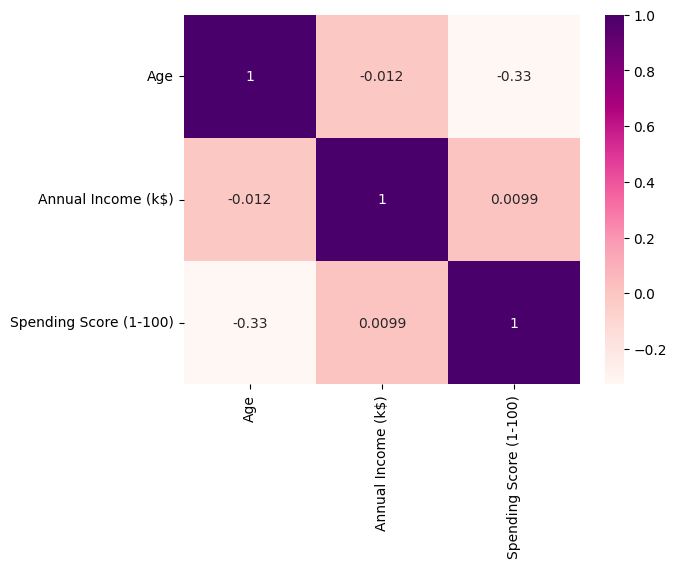

In [21]:
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

corr_matrix = data[selected_columns].corr()

sns.heatmap(corr_matrix, cmap='RdPu', annot=True)
plt.show()

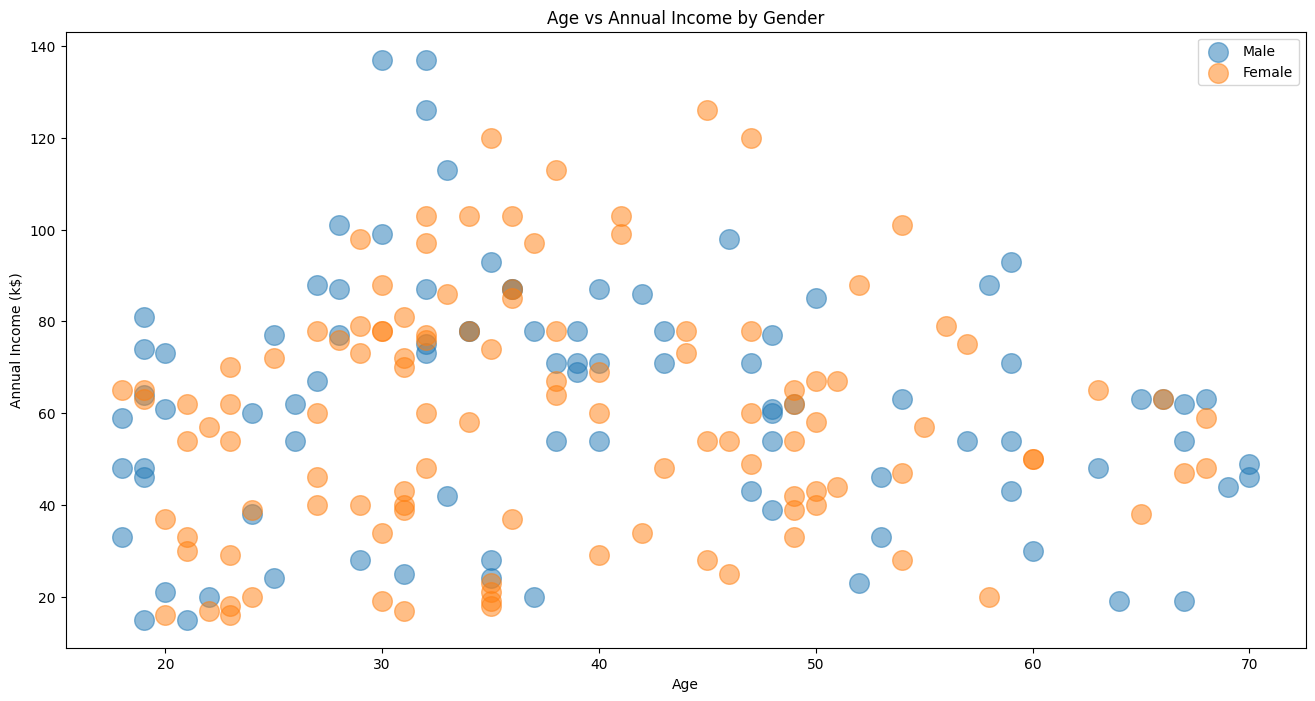

In [22]:
plt.figure(figsize = (16,8))
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Age', 
        y='Annual Income (k$)',
        data=data[data['Gender'] == gender],
        s=200, 
        alpha=0.5,
        label=gender
    )
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend() 
plt.title("Age vs Annual Income by Gender")
plt.show()


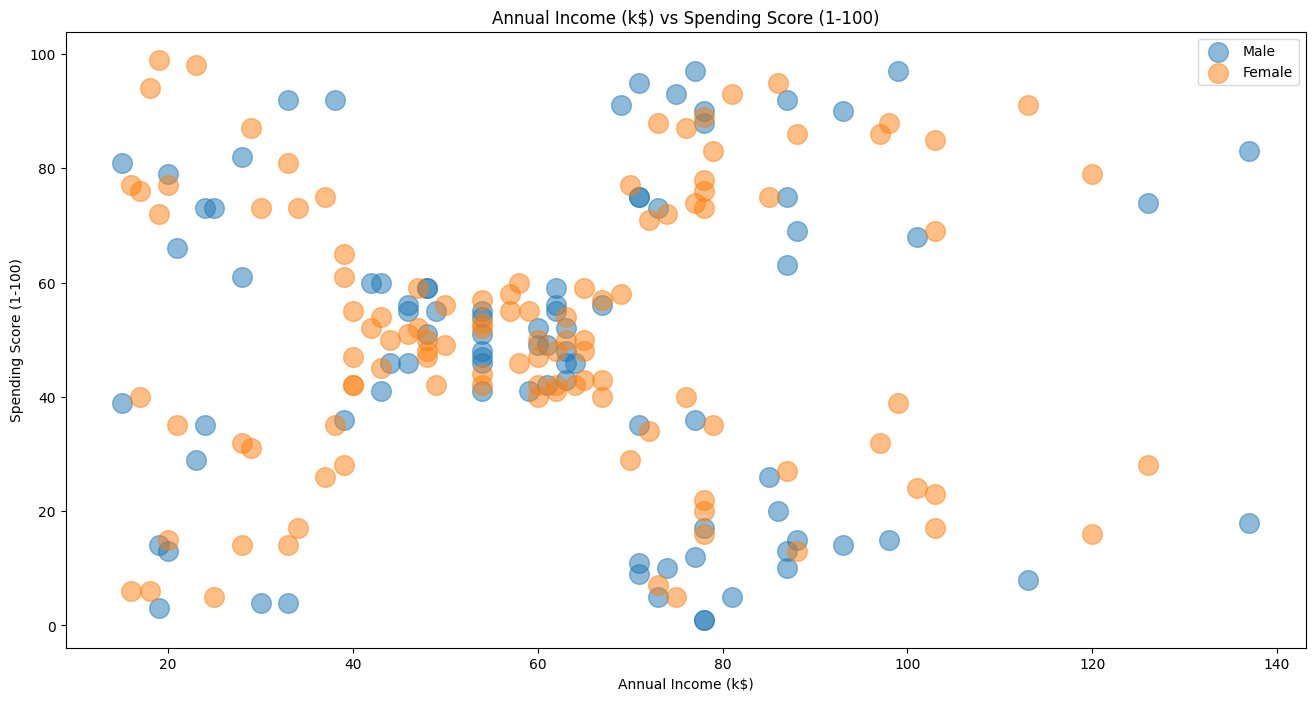

In [23]:
plt.figure(1, figsize=(16,8))
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Annual Income (k$)', 
        y='Spending Score (1-100)',
        data=data[data['Gender'] == gender],
        s=200, 
        alpha=0.5,
        label=gender
    )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()  
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()


# K- MEANS CLUSTERING

In [33]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [34]:
from sklearn.cluster import KMeans

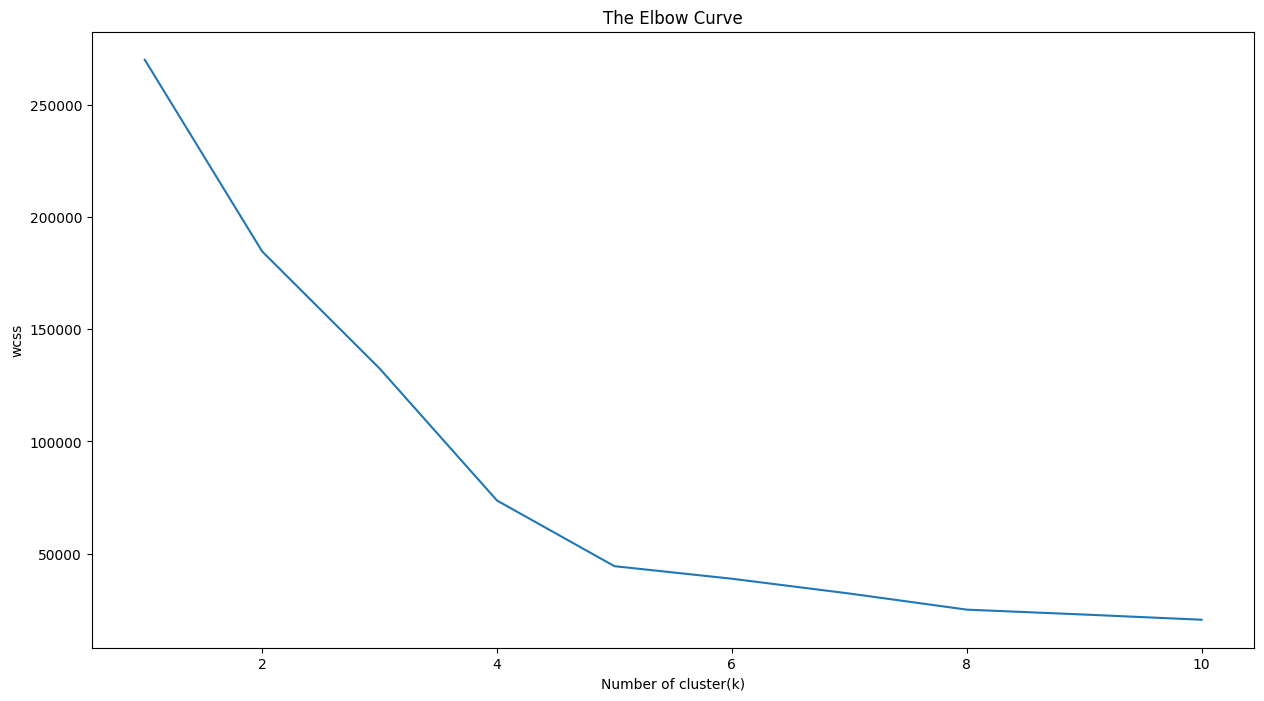

In [35]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of cluster(k)')
plt.ylabel('wcss')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 0)
Y = kmeans.fit_predict(x)

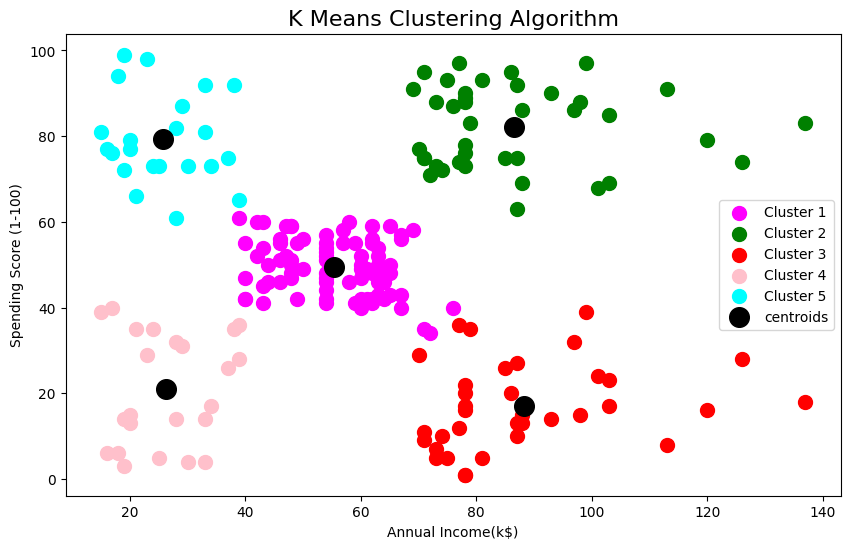

In [40]:
plt.figure(1,figsize=(10,6))
plt.scatter(x[Y == 0,0],x[Y == 0,1], s = 100,c = 'magenta',label = 'Cluster 1')
plt.scatter(x[Y == 1,0],x[Y == 1,1], s = 100,c = 'green',label = 'Cluster 2')
plt.scatter(x[Y == 2,0],x[Y == 2,1], s = 100,c = 'red',label = 'Cluster 3')
plt.scatter(x[Y == 3,0],x[Y == 3,1], s = 100,c = 'pink',label = 'Cluster 4')
plt.scatter(x[Y == 4,0],x[Y == 4,1], s = 100,c = 'cyan',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label = 'centroids')
plt.title('K Means Clustering Algorithm',fontsize=16)
plt.xlabel('Annual Income(k$)',fontsize=10)
plt.ylabel('Spending Score (1-100)',fontsize=10)
plt.legend()
plt.show()

In [47]:
# Delete the last column in the DataFrame
data = data.iloc[:, :-1]

# Confirm the last column was removed
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=42)

clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters

data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [60]:
# Save the DataFrame as a CSV file
data.to_csv('Mall_Customers.csv', index=False)

# Optional: Confirm the file was saved
print("File saved as 'Mall_Customers.csv'")


File saved as 'Mall_Customers.csv'
